In [5]:
import numpy as np
import nibabel as nib

from utils.MedSAM_segment_anything import sam_model_registry
from classes.MedSAMClass import MedSAMWrapper, MedSAMInferer

import utils.promptUtils as prUt
import utils.analysisUtils as anUt
from utils.imageUtils import read_im_gt


def load_medsam(checkpoint_path, device = 'cuda'):
    device = 'cuda'
    medsam_model = sam_model_registry['vit_b'](checkpoint=checkpoint_path)
    medsam_model = medsam_model.to(device)
    medsam_model.eval()
    return(medsam_model)

# Obtain model, image, gt
device = 'cuda'
checkpoint_path = '/home/t722s/Desktop/UniversalModels/TrainedModels/medsam_vit_b.pth'
medsam_model = load_medsam(checkpoint_path)
medsam_wrapper = MedSAMWrapper(medsam_model, device)
inferer = MedSAMInferer(medsam_wrapper, device)

# img_path = '/home/t722s/Desktop/Datasets/BratsMini/imagesTs/BraTS2021_01646.nii.gz'
# gt_path = '/home/t722s/Desktop/Datasets/BratsMini/labelsTs/BraTS2021_01646.nii.gz'
# img, gt = read_im_gt(img_path, gt_path)

img_path = '/home/t722s/Desktop/Datasets/amosForUniversegTest/imagesTs/amos_0001.nii.gz'
gt_path = '/home/t722s/Desktop/Datasets/amosForUniversegTest/labelsTs/amos_0001.nii.gz'
img, gt = read_im_gt(img_path, gt_path, 2)

Performing inference on slices: 100%|██████████| 21/21 [00:03<00:00,  6.22it/s]


0.8715762136181058

In [7]:
# Experiment: 2d bounding box per slice with foreground
n=5
box_prompt = prUt.get_minimal_boxes_row_major(gt, 3, 3)

segmentation = inferer.predict(img, box_prompt)
anUt.compute_dice(segmentation, gt)

Performing inference on slices: 100%|██████████| 21/21 [00:03<00:00,  6.13it/s]


0.8715762136181058

In [ ]:
# Experiment: 3d bounding box is sliced to give 2d bboxes
box_prompt = prUt.get_3d_box_for_2d(gt, 3, 3) # this function needs to be reworked for new row-major order

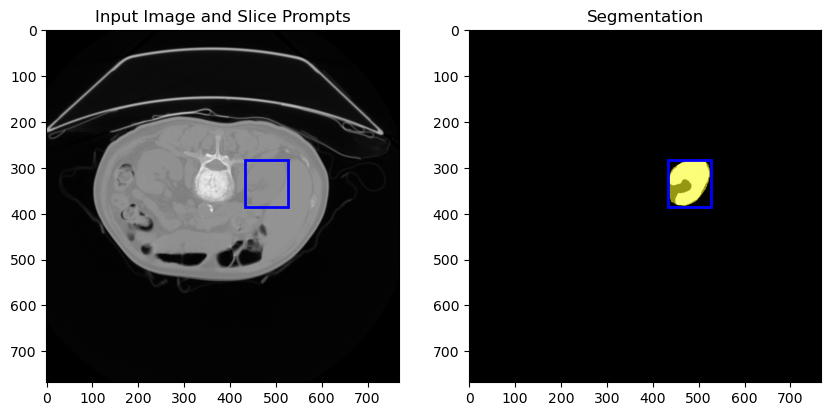

0.850728445187485

In [8]:
slice_idx = 60
anUt.show_seg_row_major(slice_idx, img, gt, segmentation, box_prompt= box_prompt)